In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Load Boston dataset from a CSV file
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

# Features and target variable
X = boston_df.drop('medv', axis=1)  # Drop the target column (medv: median value)
y = boston_df['medv']  # Target column is 'medv'

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(X, y)

# Returning the R^2 for the model
boston_r2 = boston_model.score(X, y)
print(f'R^2: {boston_r2}')

R^2: 0.7406426641094095


In [8]:
# Generate artificial linear data
linear_X, linear_y = make_regression(n_samples=506,  # Same as the number of rows in the Boston dataset
                                     n_features=13,  # Same as the number of features in the Boston dataset
                                     noise=75,       # Adjust noise to match the problem's complexity
                                     random_state=46)

# Fitting the model on the generated data
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Returning the R^2 for the model
linear_r2 = linear_model.score(linear_X, linear_y)
print(f'R^2: {linear_r2}')

R^2: 0.873743725796525


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate residuals (actual vs predicted values)
def calculate_residuals(model, features, label):
    """
    Calculate residuals between actual and predicted values.
    """
    # Predicting using the provided model
    predicted = model.predict(features)
    
    # Creating a DataFrame to store actual and predicted values
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predicted})
    
    return df_results

# Function to check the linear assumption
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


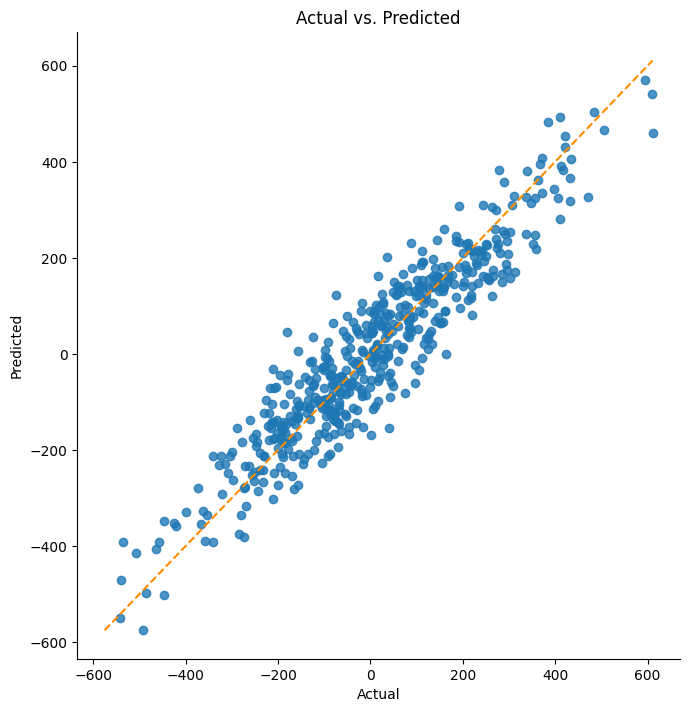

In [16]:
from sklearn.linear_model import LinearRegression

# Generate artificial linear data
linear_X, linear_y = make_regression(n_samples=506, n_features=13, noise=75, random_state=46)

# Fit the model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Test the linear assumption
linear_assumption(linear_model, linear_X, linear_y)


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


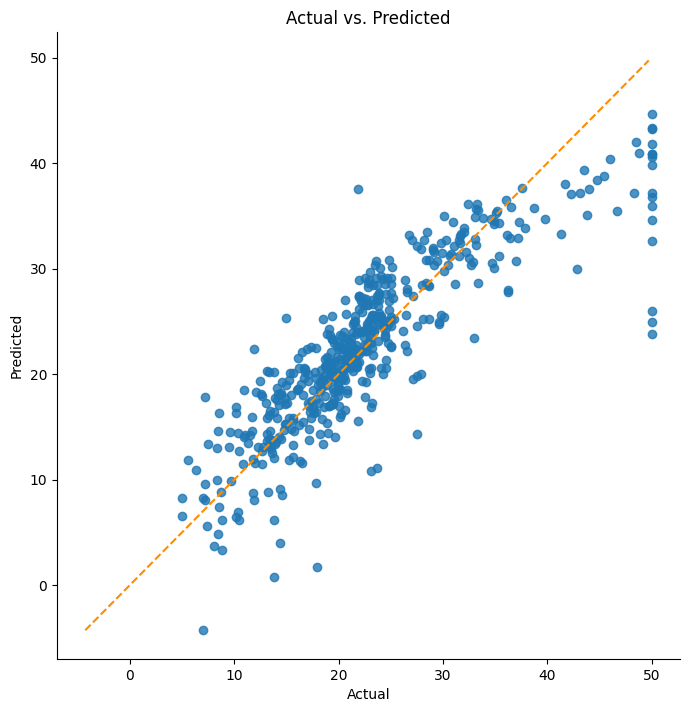

In [17]:
linear_assumption(boston_model, X, y)